# Feature Engineering

# Advanced Housing Prices- Feature Engineering
#### The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

We will be performing all the below steps in Feature Engineering

1) Missing values
2) Converting to log normal distribution
3) Handling Rare values in Categorical Features
4) Converting Categorical feature values to numeric values
5) Standarise the values of the variables to the same range (Feature Scaling)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000)

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
test_dataset = pd.read_csv('test.csv')

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
dataset.shape

(1460, 81)

In [7]:
test_dataset.shape

(1459, 80)

### **important note**

1) In kaggel we have train data and test data so to get very good good results you can combine the train and test data and perform feature engineerring or feature selection (this we do because to avoid the data leakage and we get good accuracy)

2) But In real world eg or in companies we should not do this either we should split or if it is splited data then apply feature engineering for train data and same feature enginerring I have to apply for test data


### Always remember there is always a chance of data leakage so we need to split the data first and then apply feature Engineering
* Here already data is splitted so no need to worry but apply the same techniques to test data also 

# 1) Missing Values

## Checking the nan values in categorical data

1) Check the nan values sum in the columns
2) Check the dtype of the data (if it is 'O' then it is categorical feature and we are taking only categorical features)

In [8]:
dataset['MSSubClass'].isnull().sum()

0

In [9]:
dataset['Alley'].isnull().sum()

1369

In [10]:
dataset['MSSubClass'].dtypes

dtype('int64')

In [11]:
dataset['Alley'].dtype

dtype('O')

In [12]:
np.round(dataset['Alley'].isnull().mean(),4)

0.9377

In [13]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
categorical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum() > 1 and dataset[feature].dtypes=='O']

for feature in categorical_with_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [14]:
categorical_with_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [15]:
## Just we are  replacing the nan values with new label i.e 'Missing'
def replace_cat_feature(dataset,categorical_with_nan):
    data = dataset.copy()
    data[categorical_with_nan] = data[categorical_with_nan].fillna('Missing')
    return data

dataset = replace_cat_feature(dataset,categorical_with_nan)

In [16]:
dataset[categorical_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [17]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [18]:
# applying same for test data (i.e replacing nan values with new label i.e 'Missing' in categorical features)

test_categorical_with_nan = [feature for feature in test_dataset.columns if test_dataset[feature].isnull().sum() > 1 and test_dataset[feature].dtypes=='O']

for feature in test_categorical_with_nan:
    print("{}: {}% missing values".format(feature,np.round(test_dataset[feature].isnull().mean(),4)))

MSZoning: 0.0027% missing values
Alley: 0.9267% missing values
Utilities: 0.0014% missing values
MasVnrType: 0.011% missing values
BsmtQual: 0.0302% missing values
BsmtCond: 0.0308% missing values
BsmtExposure: 0.0302% missing values
BsmtFinType1: 0.0288% missing values
BsmtFinType2: 0.0288% missing values
Functional: 0.0014% missing values
FireplaceQu: 0.5003% missing values
GarageType: 0.0521% missing values
GarageFinish: 0.0535% missing values
GarageQual: 0.0535% missing values
GarageCond: 0.0535% missing values
PoolQC: 0.9979% missing values
Fence: 0.8012% missing values
MiscFeature: 0.965% missing values


In [19]:
def replace_cat_feature(dataset,categorical_with_nan):
    data = test_dataset.copy()
    data[categorical_with_nan] = data[categorical_with_nan].fillna('Missing')
    return data

test_dataset = replace_cat_feature(test_dataset,test_categorical_with_nan)

In [20]:
test_dataset[test_categorical_with_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

## Checking the nan values in numerical data

1) Check the nan values sum in the columns
2) Check the dtype of the data (if it is 'int64' or not equal to 'O' then it is numerical feature )

In [21]:
dataset['MSSubClass'].isnull().sum()

0

In [22]:
dataset['LotFrontage'].isnull().sum()

259

In [23]:
dataset['MSSubClass'].dtypes

dtype('int64')

In [24]:
np.round(dataset['LotFrontage'].isnull().mean(),4)

0.1774

In [25]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [26]:
numerical_with_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [27]:
dataset['LotFrontage'].median()

69.0

In [28]:
## Replacing the nan values in the numerical column with their median values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value = dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'_nan']=np.where(dataset[feature].isnull(),1,0) # don't confuse with this, this is just we are creating new column that contains 1 and 0 (1 if it has nan value and 0 if it has value)
    dataset[feature].fillna(median_value,inplace=True) # Replacing the nan values with median

In [29]:
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [30]:
# applying same for test data (i.e replacing nan values with median in categorical features)

test_numerical_with_nan = [feature for feature in test_dataset.columns if test_dataset[feature].isnull().sum()>1 and test_dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in test_numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(test_dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1556% missing value
MasVnrArea: 0.0103% missing value
BsmtFullBath: 0.0014% missing value
BsmtHalfBath: 0.0014% missing value
GarageYrBlt: 0.0535% missing value


In [31]:
## Replacing the nan values in the numerical column with their median values

for feature in test_numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value = test_dataset[feature].median()
    
    ## create a new feature to capture nan values
    test_dataset[feature+'_nan']=np.where(test_dataset[feature].isnull(),1,0) # don't confuse with this, this is just we are creating new column that contains 1 and 0 (1 if
    test_dataset[feature].fillna(median_value, inplace=True) # Replacing the nan values with median

In [32]:
test_dataset[test_numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [33]:
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0


In [34]:
test_dataset.drop(['BsmtFullBath_nan','BsmtHalfBath_nan'], axis = 1, inplace = True)

In [35]:
dataset.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0


In [36]:
# we have checked which are all date time columns in previous notebook (just go and check)

# just this simple code

# year_feature = [feature for feature in dataset.columns if 'Yr' in feature or 'Year' in feature]
# year_feature

### We are cheking how old is the house (that is year sold - year build) and we also replace that columns with age of the house 

In [37]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head(3)

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0


In [38]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature] = dataset['YrSold'] - dataset[feature]

In [39]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head(3)

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0


In [40]:
# same doing for test data

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    test_dataset[feature] = test_dataset['YrSold'] - test_dataset[feature]

In [41]:
test_dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head(3)

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0


# 3) Converting to log normal distribution


Since the numerical variables are skewed we will perform log normal distribution

If we see the in previous notebook (Part_1&2_(EDA)) the numerical features are following the skewed distribution so we are converting taht to log normal distribution

In [42]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


Why we are taking only this columns ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] means if you see in previous note book these values are skewed

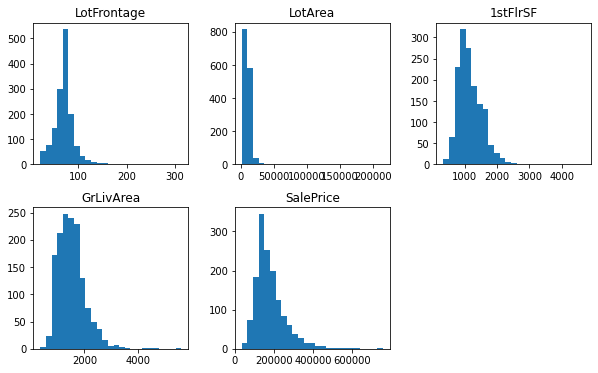

In [43]:
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 3, 1)
plt.hist(dataset['LotFrontage'],bins=25)
plt.title('LotFrontage')

plt.subplot(2, 3, 2)
plt.hist(dataset['LotArea'],bins=25)
plt.title('LotArea')

plt.subplot(2, 3, 3)
plt.hist(dataset['1stFlrSF'],bins=25)
plt.title('1stFlrSF')

plt.subplot(2, 3, 4)
plt.hist(dataset['GrLivArea'],bins=25)
plt.title('GrLivArea')

plt.subplot(2, 3, 5)
plt.hist(dataset['SalePrice'],bins=25)
plt.title('SalePrice')


plt.show()

Before applying log the above figure

In [44]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

After applying the log normal distribution the graph looks like :

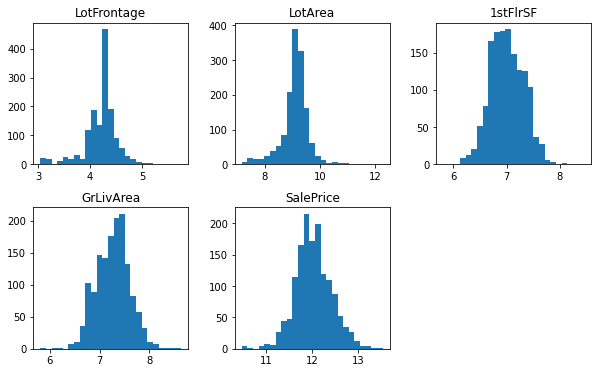

In [45]:
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 3, 1)
plt.hist(dataset['LotFrontage'],bins=25)
plt.title('LotFrontage')

plt.subplot(2, 3, 2)
plt.hist(dataset['LotArea'],bins=25)
plt.title('LotArea')

plt.subplot(2, 3, 3)
plt.hist(dataset['1stFlrSF'],bins=25)
plt.title('1stFlrSF')

plt.subplot(2, 3, 4)
plt.hist(dataset['GrLivArea'],bins=25)
plt.title('GrLivArea')

plt.subplot(2, 3, 5)
plt.hist(dataset['SalePrice'],bins=25)
plt.title('SalePrice')


plt.show()

After applying log the above figure

In [46]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [47]:
# same applying for test data (As you can see sales price i.e. target is not present in test data)
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    test_dataset[feature]=np.log(test_dataset[feature])

# 3) Handling Rare values in Categorical Features

In Categorical features we have so many values and if one of that  values are less than 1% then we will neglect that because it doen't contribute to output

#### Checking the categorical feature

In [48]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [49]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [50]:
len(dataset)

1460

In [51]:
dataset.groupby('MSZoning')['SalePrice'].count()

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: SalePrice, dtype: int64

In [52]:
a = len(dataset)
b = dataset.groupby('MSZoning')['SalePrice'].count()
c = b/a
c

MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
RL         0.788356
RM         0.149315
Name: SalePrice, dtype: float64

In [53]:
c > 0.01

MSZoning
C (all)    False
FV          True
RH          True
RL          True
RM          True
Name: SalePrice, dtype: bool

In the above you can see 'C (all)' value is less than 1% so that 'C (all)' will be replaced by Rare_var 

In [54]:
for feature in categorical_features:
    temp = dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df = temp[temp>0.01].index
#     the below code just says if the dataset[feature] is in temp_df then don't do just paste that same (i.e. dataset[feature] ) if not then replace that with 'Rare_var'
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    
    
#   applyting smae for test data
    test_dataset[feature]=np.where(test_dataset[feature].isin(temp_df),test_dataset[feature],'Rare_var')

    

In [55]:
dataset['MSZoning'].value_counts()

RL          1151
RM           218
FV            65
RH            16
Rare_var      10
Name: MSZoning, dtype: int64

As you can see that 'C (all)' is replaced with Rare_var for the MSZoning column

In [56]:
test_dataset['MSZoning'].value_counts()

RL          1114
RM           242
FV            74
Rare_var      19
RH            10
Name: MSZoning, dtype: int64

# 4) Converting Categorical feature values to numeric values

In [57]:
# calculating the number of unique values in each categorical value
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 23
The feature is Condition1 and number of categories are 6
The feature is Condition2 and number of categories are 2
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 6
The feature is RoofStyle and number of categories are 3
The feature is RoofMatl and number of categories are 2
The feature is Exterior1st and number of categories are 11
The feature is Exterior2nd and number of categories are 11
The feature is MasVnrType and number of cate

In [58]:
dataset['MSZoning'].unique()

array(['RL', 'RM', 'Rare_var', 'FV', 'RH'], dtype=object)

In [59]:
for feature in categorical_features:
    print('feature -->  {} --> Unique values --> {})'.format(feature, dataset[feature].unique()))

feature -->  MSZoning --> Unique values --> ['RL' 'RM' 'Rare_var' 'FV' 'RH'])
feature -->  Street --> Unique values --> ['Pave' 'Rare_var'])
feature -->  Alley --> Unique values --> ['Missing' 'Grvl' 'Pave'])
feature -->  LotShape --> Unique values --> ['Reg' 'IR1' 'IR2' 'Rare_var'])
feature -->  LandContour --> Unique values --> ['Lvl' 'Bnk' 'Low' 'HLS'])
feature -->  Utilities --> Unique values --> ['AllPub' 'Rare_var'])
feature -->  LotConfig --> Unique values --> ['Inside' 'FR2' 'Corner' 'CulDSac' 'Rare_var'])
feature -->  LandSlope --> Unique values --> ['Gtl' 'Mod' 'Rare_var'])
feature -->  Neighborhood --> Unique values --> ['CollgCr' 'Rare_var' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Blmngtn'
 'BrDale' 'SWISU'])
feature -->  Condition1 --> Unique values --> ['Norm' 'Feedr' 'PosN' 'Artery' 'Rare_var' 'RRAn'])
feature -->  Condition2 --> Unique 

In [60]:
dataset[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1456,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1457,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Rare_var,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,GdPrv,Shed,WD,Normal
1458,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [61]:
dataset.groupby(['MSZoning'])['SalePrice'].mean().sort_values()

MSZoning
Rare_var    11.118259
RM          11.692893
RH          11.749840
RL          12.085885
FV          12.246616
Name: SalePrice, dtype: float64

In [62]:
labels = dataset.groupby(['MSZoning'])['SalePrice'].mean().sort_values().index
labels

Index(['Rare_var', 'RM', 'RH', 'RL', 'FV'], dtype='object', name='MSZoning')

In [63]:
labels_ordered = {k:i for i,k in enumerate(labels, 0)}
labels_ordered

{'Rare_var': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

In [64]:
# doing label enoding to the categorical features (labels are assigned in the acending order order of their mean with the target column i.e Sales price)
for feature in categorical_features:
    labels_ordered = dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature] = dataset[feature].map(labels_ordered)
    
    
    # mapping same labels for train data
    test_dataset[feature] = test_dataset[feature].map(labels_ordered)
    

In [65]:
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1461,20,2,4.382027,9.360655,1,2,0,1,1,0,0,8,1,1,3,3,5,6,49,49,0,0,10,10,1,0.0,1,3,2,2,3,1,1,468.0,3,144.0,270.0,882.0,2,2,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,1.0,5,4,0,1,4,49.0,1,1.0,730.0,2,3,2,140,0,0,0,120,0,0,2,2,0,6,2010,2,3,0,0,0
1,1462,20,3,4.394449,9.565704,1,2,1,1,1,1,0,8,2,1,3,3,6,6,52,52,2,0,2,1,2,108.0,1,3,2,2,3,1,4,923.0,5,0.0,406.0,1329.0,2,2,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2.0,6,4,0,1,4,52.0,1,1.0,312.0,2,3,2,393,36,0,0,0,0,0,4,0,12500,6,2010,2,3,0,0,0
2,1463,60,3,4.304065,9.534595,1,2,1,1,1,0,0,13,2,1,3,5,5,5,13,12,0,0,10,10,1,0.0,1,3,4,3,3,1,6,791.0,5,0.0,137.0,928.0,2,3,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,1.0,6,4,1,3,4,13.0,3,2.0,482.0,2,3,2,212,34,0,0,0,0,0,2,2,0,3,2010,2,3,0,0,0
3,1464,60,3,4.356709,9.208138,1,2,1,1,1,0,0,13,2,1,3,5,6,6,12,12,0,0,10,10,2,20.0,1,3,4,2,3,1,6,602.0,5,0.0,324.0,926.0,2,4,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2.0,7,4,1,4,4,12.0,3,2.0,470.0,2,3,2,360,36,0,0,0,0,0,4,2,0,6,2010,2,3,0,0,0
4,1465,120,3,3.761200,8.518193,1,2,1,3,1,0,0,20,2,1,4,3,8,5,18,18,0,0,6,5,1,0.0,2,3,4,3,3,1,4,263.0,5,0.0,1017.0,1280.0,2,4,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2.0,5,4,0,1,4,18.0,2,2.0,506.0,2,3,2,0,82,0,0,144,0,0,4,2,0,1,2010,2,3,0,0,0


In [66]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1459 non-null   int64  
 1   MSSubClass       1459 non-null   int64  
 2   MSZoning         1459 non-null   int64  
 3   LotFrontage      1459 non-null   float64
 4   LotArea          1459 non-null   float64
 5   Street           1459 non-null   int64  
 6   Alley            1459 non-null   int64  
 7   LotShape         1459 non-null   int64  
 8   LandContour      1459 non-null   int64  
 9   Utilities        1459 non-null   int64  
 10  LotConfig        1459 non-null   int64  
 11  LandSlope        1459 non-null   int64  
 12  Neighborhood     1459 non-null   int64  
 13  Condition1       1459 non-null   int64  
 14  Condition2       1459 non-null   int64  
 15  BldgType         1459 non-null   int64  
 16  HouseStyle       1459 non-null   int64  
 17  OverallQual   

#### so no datatype is object all features is successfully converted to numeric values (and happy we can apply tranform function for scaling)

# 4) Feature Scaling

In [67]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


We are not considering the ID and target column

In [68]:
feature_scale = [feature for feature in dataset.columns if feature not in ['Id','SalePrice']]
# feature_scale

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [70]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [71]:
# converting to the dataframe
scaled_data = pd.DataFrame(scaler.transform(dataset[feature_scale]), columns = feature_scale)

In [72]:
scaled_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [73]:
# taking id and sales price column
x = dataset[['Id', 'SalePrice']]

In [74]:
x.head()

,Id,SalePrice
0,1,12.247694
1,2,12.109011
2,3,12.317167
3,4,11.849398
4,5,12.429216


In [75]:
# writing in a single code and concatinating with ID and sales column
data = pd.concat([x, scaled_data], axis=1)

In [76]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [77]:
# taking this dataframe into new csv file 
data.to_csv('train_scaled.csv',index=False)

In [78]:
## applying same for test data (here you can see i didn't gave sales price column because test data has no target)

test_feature_scale = [feature for feature in test_dataset.columns if feature not in ['Id']]

In [79]:
# applying same for test data so we have used tranform

scaler.transform(test_dataset[test_feature_scale])

array([[0.        , 0.5       , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49966182, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.46620707, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.75      , 0.75162522, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.75      , 0.40071794, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.75      , 0.46620707, ..., 0.        , 0.        ,
        0.        ]])

In [80]:
# converting to the dataframe
test_scaled_data = pd.DataFrame(scaler.transform(test_dataset[feature_scale]), columns = test_feature_scale)

In [81]:
test_scaled_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0.000000,0.50,0.495064,0.428726,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.363636,0.2,1.0,0.75,0.6,0.444444,0.625,0.360294,0.819672,0.0,0.0,1.0,1.0,0.25,0.0000,0.333333,1.0,0.5,0.50,0.75,0.25,0.166667,0.082920,0.500000,0.097693,0.115582,0.144354,1.0,0.50,1.0,1.0,0.373438,0.000000,0.0,0.349081,0.0,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.333333,0.25,0.514810,0.666667,1.0,1.0,0.163361,0.000000,0.0,0.0,0.25,0.0,0.0,0.5,1.0,0.000000,0.454545,1.0,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.75,0.499662,0.468857,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.625,0.382353,0.868852,1.0,0.0,0.2,0.1,0.50,0.0675,0.333333,1.0,0.5,0.50,0.75,0.25,0.666667,0.163536,0.833333,0.000000,0.173801,0.217512,1.0,0.50,1.0,1.0,0.522632,0.000000,0.0,0.488544,0.0,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.2,0.8,0.485981,0.333333,0.25,0.220028,0.666667,1.0,1.0,0.458576,0.065814,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.806452,0.454545,1.0,0.666667,0.75,0.0,0.0,0.0
2,0.235294,0.75,0.466207,0.462769,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.590909,0.4,1.0,0.75,1.0,0.444444,0.500,0.095588,0.213115,0.0,0.0,1.0,1.0,0.25,0.0000,0.333333,1.0,1.0,0.75,0.75,0.25,1.000000,0.140149,0.833333,0.000000,0.058647,0.151882,1.0,0.75,1.0,1.0,0.386718,0.339467,0.0,0.560546,0.0,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.121495,1.000000,0.50,0.339915,0.666667,1.0,1.0,0.247375,0.062157,0.0,0.0,0.00,0.0,0.0,0.5,1.0,0.000000,0.181818,1.0,0.666667,0.75,0.0,0.0,0.0
3,0.235294,0.75,0.485693,0.398875,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.590909,0.4,1.0,0.75,1.0,0.555556,0.625,0.088235,0.213115,0.0,0.0,1.0,1.0,0.50,0.0125,0.333333,1.0,1.0,0.50,0.75,0.25,1.000000,0.106662,0.833333,0.000000,0.138699,0.151555,1.0,1.00,1.0,1.0,0.385901,0.328329,0.0,0.555075,0.0,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,0.112150,1.000000,0.50,0.331453,0.666667,1.0,1.0,0.420070,0.065814,0.0,0.0,0.00,0.0,0.0,1.0,1.0,0.000000,0.454545,1.0,0.666667,0.75,0.0,0.0,0.0
4,0.588235,0.75,0.265271,0.263841,1.0,1.0,0.333333,1.000000,1.0,0.00,0.0,0.909091,0.4,1.0,1.00,0.6,0.777778,0.500,0.132353,0.311475,0.0,0.0,0.6,0.5,0.25,0.0000,0.666667,1.0,1.0,0.75,0.75,0.25,0.666667,0.046598,0.833333,0.000000,0.435360,0.209493,1.0,1.00,1.0,1.0,0.508416,0.000000,0.0,0.475254,0.0,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.168224,0.666667,0.50,0.356841,0.666667,1.0,1.0,0.000000,0.149909,0.0,0.0,0.30,0.0,0.0,1.0,1.0,0.000000,0.000000,1.0,0.666667,0.75,0.0,0.0,0.0


In [82]:
# taking this dataframe into new csv file 
test_scaled_data.to_csv('test_scaled.csv',index=False)